In [86]:
import random
import numpy as np
import data_utils
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)
print(f'Training data shape: {X_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


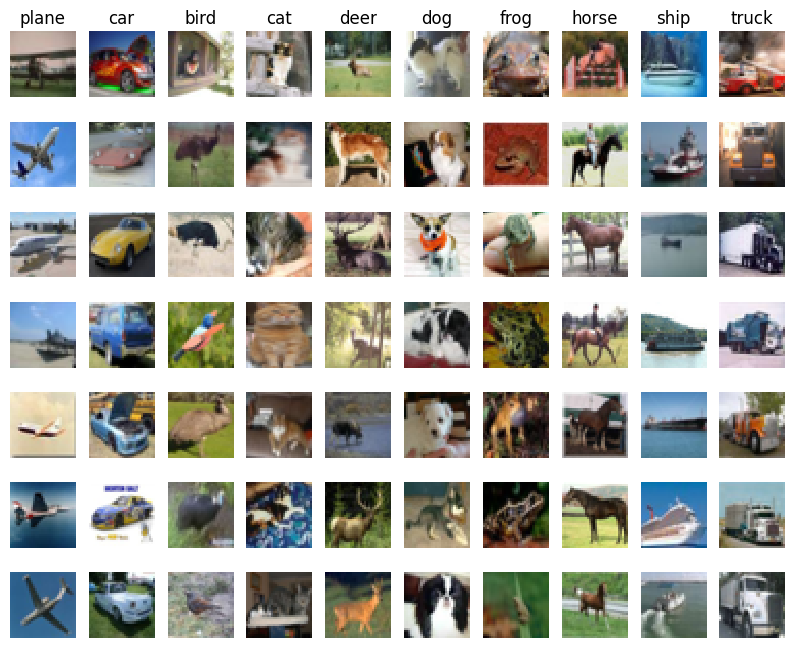

In [88]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [89]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print(f'Training data shape: {X_train.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Validation data shape: {X_val.shape}')
print(f'Validation labels shape: {y_val.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Test labels shape: {y_test.shape}')
print(f'Dev data shape: {X_dev.shape}')
print(f'Dev labels shape: {y_dev.shape}')

Training data shape: (49000, 32, 32, 3)
Train labels shape: (49000,)
Validation data shape: (1000, 32, 32, 3)
Validation labels shape: (1000,)
Test data shape: (1000, 32, 32, 3)
Test labels shape: (1000,)
Dev data shape: (500, 32, 32, 3)
Dev labels shape: (500,)


In [90]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

print(f'Training data shape: {X_train.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Validation data shape: {X_val.shape}')
print(f'Validation labels shape: {y_val.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Test labels shape: {y_test.shape}')
print(f'Dev data shape: {X_dev.shape}')
print(f'Dev labels shape: {y_dev.shape}')

Training data shape: (49000, 3072)
Train labels shape: (49000,)
Validation data shape: (1000, 3072)
Validation labels shape: (1000,)
Test data shape: (1000, 3072)
Test labels shape: (1000,)
Dev data shape: (500, 3072)
Dev labels shape: (500,)


[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


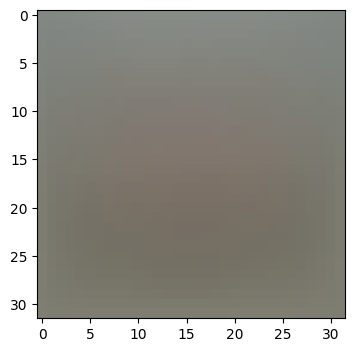

In [91]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()

In [92]:
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [93]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [94]:
from classifiers.linear_svm import svm_loss_naive
import time
W = np.random.randn(3073, 10) * 0.0001 
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.00001)
print(f'loss: {loss}')


loss: 9.7887975822555


In [95]:
from gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 34.90016269500629 analytic: 34.90016269247602, relative error: 3.6250031561852236e-11
numerical: -15.972715714607231 analytic: -15.972715713136209, relative error: 4.604797460058376e-11
numerical: -5.730776285606253 analytic: -5.730776284311922, relative error: 1.1292805724301421e-10
numerical: -33.07307959197203 analytic: -33.07307959201036, relative error: 5.79424045775598e-13
numerical: -5.828099676463693 analytic: -5.774767020330829, relative error: 0.004596506839779324
numerical: 1.7648157147220898 analytic: 1.7648157149100925, relative error: 5.32641235345531e-11
numerical: 13.678642448056165 analytic: 13.678642447730132, relative error: 1.1917576453419876e-11
numerical: 4.928718570251789 analytic: 4.928718571609874, relative error: 1.3777264620705915e-10
numerical: 16.299749714487888 analytic: 16.299749713797453, relative error: 2.1179293806549245e-11
numerical: 10.942433877847433 analytic: 10.942433876324442, relative error: 6.959107671064581e-11


In [96]:
# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = svm_loss_naive(W, X_dev, y_dev, 1e2)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 35.27729119729983 analytic: 35.27729119719828, relative error: 1.4393220730444363e-12
numerical: -13.993304558734819 analytic: -13.993304558209232, relative error: 1.8779934471114562e-11
numerical: 21.702724509076177 analytic: 21.75967863386013, relative error: 0.0013104228175475276
numerical: 0.467224257327814 analytic: 0.46722425666319484, relative error: 7.112421150567453e-10
numerical: 12.403084846202004 analytic: 12.40308484646262, relative error: 1.0506112816475436e-11
numerical: 4.213123998386692 analytic: 4.2131239984794915, relative error: 1.1013151507057634e-11
numerical: -12.210475295670873 analytic: -12.210475295256186, relative error: 1.6980786636470055e-11
numerical: 14.925344968474972 analytic: 14.975872420022055, relative error: 0.0016898125213631239
numerical: 7.055345170758897 analytic: 7.055345171029201, relative error: 1.9155957136905387e-11
numerical: -7.61805850126862 analytic: -7.618058500846009, relative error: 2.7737466130393967e-11


In [97]:
# Next implement the function svm_loss_vectorized; for now only compute the loss;
# we will implement the gradient in a moment.
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print(f'Naive loss: {loss_naive} computed in {toc - tic}s')

from classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print(f'Vectorized loss: {loss_vectorized} computed in {toc - tic}s')

# The losses should match but your vectorized implementation should be much faster.
print(f'difference: {loss_naive - loss_vectorized}')

Naive loss: 9.7887975822555 computed in 0.045217037200927734s
Vectorized loss: 9.788797582255485 computed in 0.02036309242248535s
difference: 1.4210854715202004e-14


In [98]:
# Complete the implementation of svm_loss_vectorized, and compute the gradient
# of the loss function in a vectorized way.

# The naive implementation and the vectorized implementation should match, but
# the vectorized version should still be much faster.
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print(f'Naive loss and gradient: computed in {toc - tic}s')

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print(f'Vectorized loss and gradient: computed in {toc - tic}s')

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them.
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print(f'difference: {difference}')

Naive loss and gradient: computed in 0.04645895957946777s
Vectorized loss and gradient: computed in 0.006515979766845703s
difference: 7.225040780461072e-12


In [99]:
from classifiers.linear_classifier import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print(f'That took {toc-tic}s')

iteration 0/1500: loss 786.5836845396785
iteration 100/1500: loss 286.28529661027073
iteration 200/1500: loss 107.86539289290343
iteration 300/1500: loss 42.133715769131555
iteration 400/1500: loss 18.933301783059477
iteration 500/1500: loss 9.961755879253607
iteration 600/1500: loss 6.966102985288398
iteration 700/1500: loss 5.840531683214278
iteration 800/1500: loss 5.942815267629085
iteration 900/1500: loss 5.293275097300772
iteration 1000/1500: loss 4.647193500794332
iteration 1100/1500: loss 5.311257035849307
iteration 1200/1500: loss 5.520970214670961
iteration 1300/1500: loss 5.930317933596647
iteration 1400/1500: loss 5.283052048952354
That took 4.590698003768921s


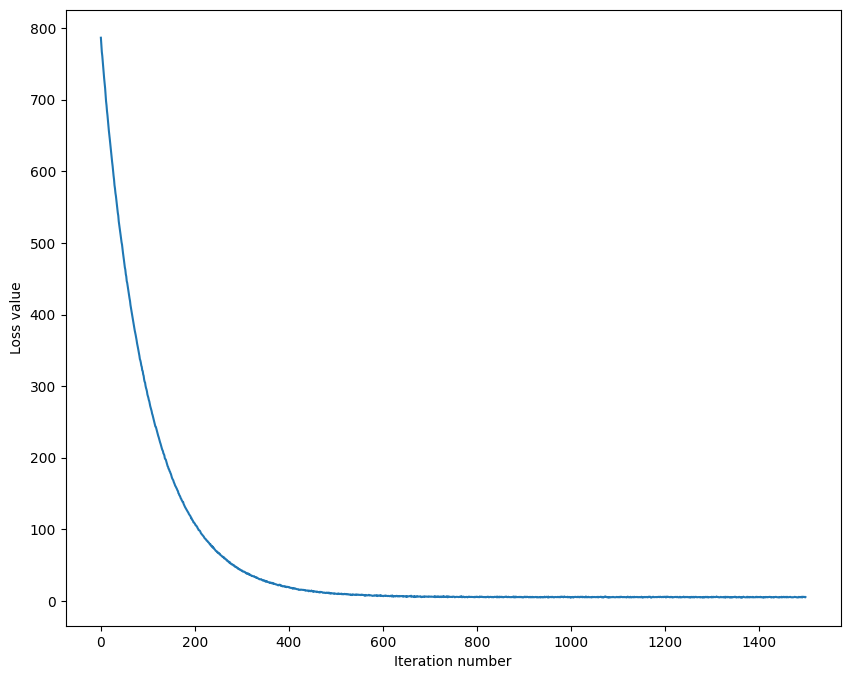

In [100]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [101]:
X_train.shape

(49000, 3073)

In [102]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train)
print(f'training accuracy: {np.mean(y_train == y_train_pred)}')
y_val_pred = svm.predict(X_val)
print(f'validation accuracy: {np.mean(y_val == y_val_pred)}')

training accuracy: 0.36557142857142855
validation accuracy: 0.379


In [103]:
learning_rates = [1e-7, 5e-5]
#learning_rates = [1e-7]
regularization_strengths = [(j+0.1*i)*1e4 for j in range(1,5) for i in range(0,10)]
#regularization_strengths = [5e4, 1e5]

results = {}
best_val = -1
best_svm = None

for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train, y_train, learning_rate=lr, reg=reg,
                              num_iters=1500)
        y_train_pred = svm.predict(X_train)
        train_acc = np.mean(y_train == y_train_pred)
        #print(f'training accuracy: {np.mean(y_train == y_train_pred)}')
        y_val_pred = svm.predict(X_val)
        val_acc = np.mean(y_val == y_val_pred)
        #print(f'validation accuracy: {np.mean(y_val == y_val_pred)}')
        results[(lr, reg)] = (train_acc, val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print(f'lr {lr} reg {reg} train accuracy {train_accuracy} val accuracy {val_accuracy}')

print(f'best validation accuracy achieved during cross-validation: {best_val}')
        

/Users/abhishekmishra/Documents/Courses/CS231n/CS231n_winter2016_py3/classifiers/linear_svm.py:84: RuntimeWarning: overflow encountered in scalar multiply
  loss += 0.5 * reg * np.sum(W * W)
/Users/abhishekmishra/anaconda3/envs/cs231n/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/abhishekmishra/Documents/Courses/CS231n/CS231n_winter2016_py3/classifiers/linear_svm.py:84: RuntimeWarning: overflow encountered in multiply
  loss += 0.5 * reg * np.sum(W * W)


lr 1e-07 reg 10000.0 train accuracy 0.375469387755102 val accuracy 0.374
lr 1e-07 reg 11000.0 train accuracy 0.3746122448979592 val accuracy 0.393
lr 1e-07 reg 12000.0 train accuracy 0.37848979591836734 val accuracy 0.369
lr 1e-07 reg 13000.0 train accuracy 0.3843877551020408 val accuracy 0.388
lr 1e-07 reg 14000.0 train accuracy 0.3776326530612245 val accuracy 0.389
lr 1e-07 reg 15000.0 train accuracy 0.3856530612244898 val accuracy 0.387
lr 1e-07 reg 16000.0 train accuracy 0.3828979591836735 val accuracy 0.379
lr 1e-07 reg 17000.0 train accuracy 0.38581632653061226 val accuracy 0.379
lr 1e-07 reg 18000.0 train accuracy 0.38579591836734695 val accuracy 0.384
lr 1e-07 reg 19000.0 train accuracy 0.38210204081632654 val accuracy 0.39
lr 1e-07 reg 20000.0 train accuracy 0.3838979591836735 val accuracy 0.386
lr 1e-07 reg 21000.0 train accuracy 0.384 val accuracy 0.401
lr 1e-07 reg 22000.0 train accuracy 0.3820816326530612 val accuracy 0.386
lr 1e-07 reg 23000.0 train accuracy 0.37891836734

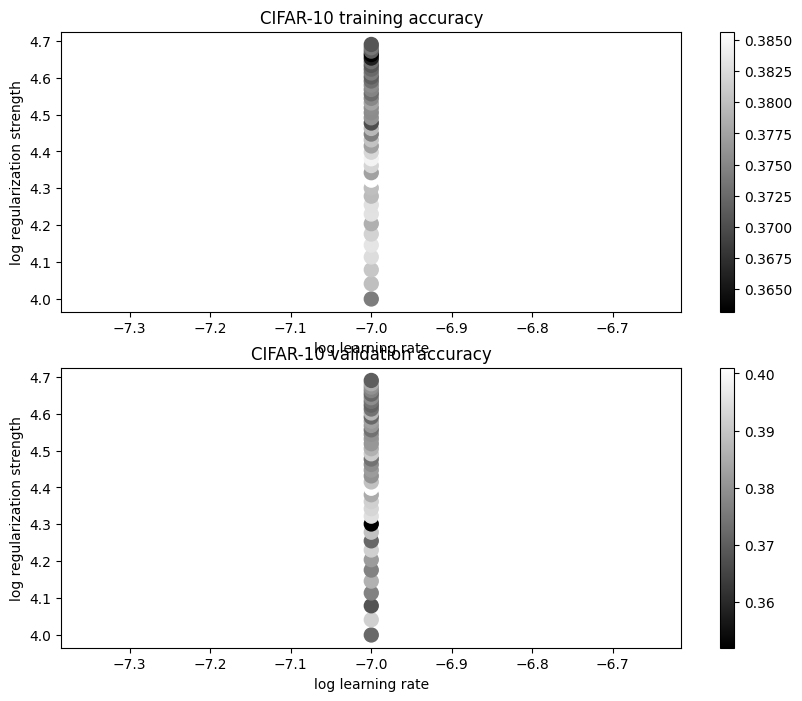

In [54]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

marker_size = 100
colors = [results[x][0] for x in results]

plt.subplot(2,1,1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

colors = [results[x][1] for x in results]
plt.subplot(2,1,2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [55]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print(f'linear SVM on raw pixels final test set accuracy {test_accuracy}')

linear SVM on raw pixels final test set accuracy 0.364


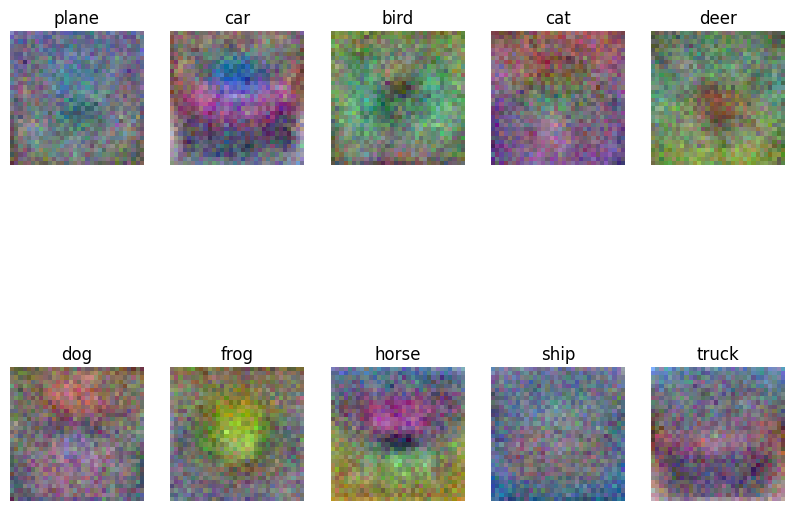

In [68]:
w = best_svm.W[:-1,:]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i+1)

    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])